                X              Y
0    6.000000e+00   1.102916e+03
0    1.273610e+04   6.488319e+08
0   -7.427067e+04   2.206453e+10
0    4.007894e+05   6.425285e+11
0   -1.993858e+06   1.590188e+13
0    9.930959e+06   3.944958e+14
0   -4.967823e+07   9.871706e+15
0    2.484103e+08   2.468307e+17
0   -1.242028e+09   6.170534e+18
0    6.210095e+09   1.542611e+20
0   -3.105049e+10   3.856533e+21
0    1.552524e+11   9.641329e+22
0   -7.762622e+11   2.410332e+24
0    3.881311e+12   6.025830e+25
0   -1.940655e+13   1.506457e+27
0    9.703277e+13   3.766144e+28
0   -4.851639e+14   9.415359e+29
0    2.425819e+15   2.353840e+31
0   -1.212910e+16   5.884599e+32
0    6.064548e+16   1.471150e+34
0   -3.032274e+17   3.677875e+35
0    1.516137e+18   9.194687e+36
0   -7.580685e+18   2.298672e+38
0    3.790343e+19   5.746679e+39
0   -1.895171e+20   1.436670e+41
0    9.475857e+20   3.591674e+42
0   -4.737928e+21   8.979186e+43
0    2.368964e+22   2.244797e+45
0   -1.184482e+23   5.611991e+46
0    5.922

<string>:2: RuntimeWarning: overflow encountered in double_scalars


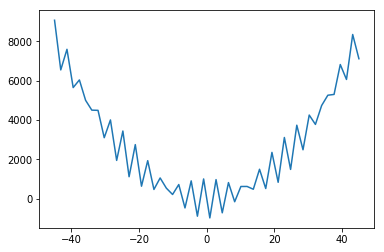

In [132]:
%matplotlib inline
import random
from sympy import diff, Symbol, sin, cos, limit
from sympy.utilities.lambdify import lambdify, implemented_function
import matplotlib.pyplot as plt
from ipywidgets import interact

#定義loss function 及 loss function的微分，以及 learning rate
x = Symbol('x')
loss_function_expr = 4*x**2+1000*sin(60*x)
loss_function_exec = lambdify((x), loss_function_expr)
diff_lossfunc_to_x_expr = diff(loss_function_expr)
diff_lossfunc_to_x_exec = lambdify((x), diff_lossfunc_to_x_expr)
learning_rate = 0.75

#定義產生下一個隨機點的函數
def generate_next_random_point(startx, diff_lossfunction = diff_lossfunc_to_x_exec, learning_rate = learning_rate):
    slope = diff_lossfunction(startx)
    next_point = startx-learning_rate*slope
    return(next_point)

x=np.linspace(-45,45)
plt.plot(x, loss_function_exec(x))
#隨機開始起始點
random_start = random_start_x = random.randint(-45,45)
tmp_y_from_random_start = tmp_y_from_random_start_y = loss_function_exec(random_start)
df = pd.DataFrame([[random_start, tmp_y_from_random_start]], columns=list('XY'))

#慢慢移動到最小值，移動300次
for i in range(234):
    result = generate_next_random_point(random_start_x,diff_lossfunc_to_x_exec,learning_rate)
    result_y_from_x = loss_function_exec(result)
    df2 = pd.DataFrame([[result, result_y_from_x]], columns=list('XY'))
    df = df.append(df2)
    random_start_x = result

#df = df.replace([np.inf, -np.inf], np.nan)
df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
df = df[np.isfinite(df).all(1)]

#interact描繪梯度遞減過程
def gra_dec_draw(iteri, df = df, x = x):
    plotx = df.iloc[iteri,0]
    ploty = df.iloc[iteri,1]
    plt.scatter(plotx, ploty, color='red')
    #plt.plot(x, loss_function_exec(x))
    
print(df)

In [116]:
interact(gra_dec_draw,iteri=(-45,45))#iteri = 100
#plt.scatter(df.iloc[iteri,0],df.iloc[iteri,1], color='red')
#type(df.iloc[iteri,1])
#df.is.null

numpy.float64